In [1]:
import torch
from torch import nn

from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
# Downloading the data
train_data= datasets.FashionMNIST(
    root= 'data',
    train=True,
    transform=ToTensor(),
    download=True,
    target_transform=None
)
test_data= datasets.FashionMNIST(
    root= 'data',
    train=False,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

In [3]:
image,label= train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:

class_to_idx=train_data.class_to_idx
image.shape, class_name[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

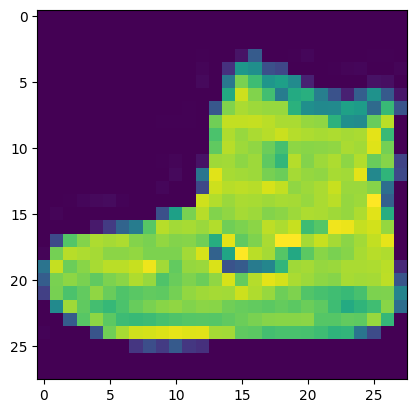

In [6]:
# Visualize the data
plt.imshow(image.squeeze())

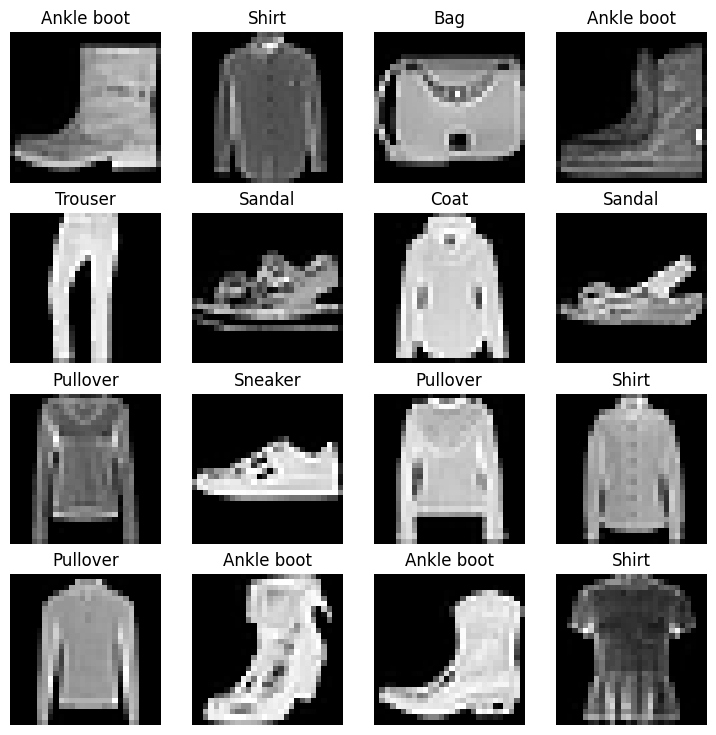

In [7]:
# Visualize more images
torch.manual_seed(42)
fig= plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range (1, rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_name[label])
    plt.axis(False)

In [8]:
# Preparing the data loader

from torch.utils.data import DataLoader

batch_size=64

train_data_loader=DataLoader(batch_size=batch_size,
                             shuffle=True,
                             dataset=train_data)
test_data_loader=DataLoader(batch_size=batch_size,
                             shuffle=False,
                             dataset=test_data)

print(f'Length of Data Loaders : {len(train_data_loader),len(test_data_loader)}')

Length of Data Loaders : (938, 157)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

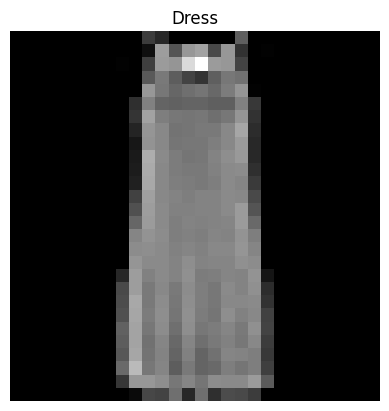

In [9]:
# Check the data loader sample
train_features_batch,train_label_batch=next(iter(train_data_loader))
# show a sample
torch.manual_seed(42)
random_idx= torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_name[label])
plt.axis(False)

### Building the model

In [10]:
# Create a Conv2D 
class FashionMNISTModel_03(nn.Module):
    def __init__(self,input_layer:int,
                #  hidden_units:int,
                 output_layer:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_layer,
                      out_channels=512,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512,
                      out_channels=400,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
       
            nn.MaxPool2d(kernel_size=3)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=400,
                      out_channels=256,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256,
                      out_channels=128,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
    
            nn.MaxPool2d(kernel_size=3)
        )
        self.conv_block_3=nn.Sequential(
            nn.Conv2d(in_channels=128,
                      out_channels=64,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64,
                      out_channels=32,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
        
            nn.MaxPool2d(kernel_size=3)
        )
        
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=32,
                      out_features=output_layer)
        )
        
    def __call__(self,x):
        x=self.conv_block_1(x)
        # print(x.shape)
        x=self.conv_block_2(x)
        x=self.conv_block_3(x)
        # print(x.shape)
        x=self.classifier(x)
        # print(x.shape)
        return x
        

In [11]:
device='cuda' if torch.cuda.is_available() else 'cpu'
# device='cpu'
torch.manual_seed(42)
model_1=torch.compile(FashionMNISTModel_03(input_layer=1, # cz the color channel of our image is 1
                            # hidden_units=10, #number of classes, here it is 10
                            output_layer=len(class_name))).to(device)

In [12]:
torch.set_float32_matmul_precision('high')
# Check the hidden unit shape
rand_image_tensor= torch.randn(size=(1,28,28)).unsqueeze(0)
model_1(rand_image_tensor.to(device))

tensor([[-0.1061, -0.0787, -0.1234, -0.0704,  0.0512, -0.0123,  0.0916, -0.1287,
          0.0250, -0.1448]], device='cuda:0',
       grad_fn=<CompiledFunctionBackward>)

In [13]:
# Setup loss and optimizer function

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [14]:
# Training
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss,train_acc=0,0

    model.train()
    #training
    train_loss=0
    # add a loop to loop through the training batch
    for batch, (X,y) in enumerate(data_loader):
        #put data on target device
        X,y=X.to(device),y.to(device)
        #forward pass
        y_pred=model(X)

        loss= loss_fn(y_pred,y)
        train_loss +=loss #accumulate train loss
        train_acc +=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # ajust the training batch- divide total train loss by length of train dataloader
    train_loss /=len(data_loader)
    train_acc /=len(data_loader)
    print(f'Train_loss: {train_loss:.3f} | Train_acc: {train_acc:.3f}')

    return train_loss, train_acc


In [15]:
# Testing
def testing_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
    
    test_loss,test_acc=0,0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X,y= X.to(device), y.to(device)
            #forward pass
            test_pred=model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true= y, y_pred=test_pred.argmax(dim=1)) ## we are comparing label to label. y values contain label

        # Calculate the test loss average per batch
        test_loss /= len(data_loader)

        # Calculate the test acc average per batch
        test_acc /=len(data_loader)
    
    #print out    
    print(f'Test loss: {test_loss :.5f}|Test acc: {test_acc:.5f}')
    return test_loss, test_acc

In [16]:
class EarlyStoppingByLoss:
    def __init__(self, patience:int, verbose=True):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, test_loss, model):
        if test_loss < self.best_loss:
            self.best_loss = test_loss
            self.counter = 0  # Reset patience
            torch.save(model.state_dict(), 'checkpoint.pt')
            if self.verbose:
                print(f"New best test loss: {test_loss:.6f}. Saving model.")
        else:
            self.counter += 1
            if self.verbose:
                print(f"No improvement in test loss for {self.counter} epoch(s).")
            if self.counter >= self.patience:
                if self.verbose:
                    print(f"Early stopping: No improvement in test loss for {self.patience} epochs.")
                self.early_stop = True



In [17]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn
epochs = 30
best_train_acc = 0
# target_train_acc = 88  # Stop 
early_stopping = EarlyStoppingByLoss(patience=3, verbose=True)
for epoch in tqdm(range(epochs)):
    print(f'\nEpoch: {epoch}\n------')
    train_loss, train_acc = train_step(
        model=model_1,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_loss, test_acc = testing_step(
        model=model_1,
        data_loader=test_data_loader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

     # Early stopping step
    early_stopping(test_loss, model_1)
    if early_stopping.early_stop:
        print(f"Stopped early at epoch {epoch+1}")
        break 


  0%|          | 0/30 [00:00<?, ?it/s]


Epoch: 0
------
Train_loss: 0.965 | Train_acc: 63.075
Test loss: 0.48572|Test acc: 81.99642
New best test loss: 0.485722. Saving model.

Epoch: 1
------
Train_loss: 0.400 | Train_acc: 85.145
Test loss: 0.40305|Test acc: 84.68352
New best test loss: 0.403046. Saving model.

Epoch: 2
------
Train_loss: 0.318 | Train_acc: 88.198
Test loss: 0.33491|Test acc: 87.78861
New best test loss: 0.334910. Saving model.

Epoch: 3
------
Train_loss: 0.276 | Train_acc: 89.862
Test loss: 0.28604|Test acc: 89.39092
New best test loss: 0.286037. Saving model.

Epoch: 4
------
Train_loss: 0.246 | Train_acc: 90.925
Test loss: 0.33772|Test acc: 87.40048
No improvement in test loss for 1 epoch(s).

Epoch: 5
------
Train_loss: 0.223 | Train_acc: 91.763
Test loss: 0.26743|Test acc: 90.07763
New best test loss: 0.267425. Saving model.

Epoch: 6
------
Train_loss: 0.204 | Train_acc: 92.482
Test loss: 0.29429|Test acc: 90.05772
No improvement in test loss for 1 epoch(s).

Epoch: 7
------
Train_loss: 0.184 | Trai

In [18]:
# Get the result library
import tqdm
from tqdm.auto import tqdm
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
    """Returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc=0,0
    model.eval()
    with torch. inference_mode():
        for X,y in tqdm(data_loader):
           X,y=X.to(device),y.to(device)
           # make predictions
           y_pred = model(X)

           # accumulate the loss and acc values per batch
           loss +=loss_fn(y_pred,y)
           acc +=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find the average loss/acc per batch
        loss /=len(data_loader)
        acc /= len(data_loader)
    
    return {'model_name':model.__class__.__name__,
            'model_loss': loss.item(),
            'model_acc': acc}

In [19]:
model_1_results=eval_model(
    data_loader=test_data_loader,
    model=model_1,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_1_results

  0%|          | 0/157 [00:00<?, ?it/s]

{'model_name': 'OptimizedModule',
 'model_loss': 0.22592391073703766,
 'model_acc': 92.33678343949045}

### Make the predictions

In [20]:
#making the predictions

from tqdm.auto import tqdm

y_preds=[]
model_1.eval()

with torch.inference_mode():
    for X,y in tqdm(test_data_loader, desc="Making predictions....."):
        X,y= X.to(device), y.to(device)
        y_logit=model_1(X)
        # logits---> probabilities---> labels
        y_pred= torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)

        #put the prediction to the CPU
        y_preds.append(y_pred.cpu())

#Concate list of predictions into a tensor
# print(y_preds)
y_pred_tensor= torch.cat(y_preds)
y_pred_tensor

Making predictions.....:   0%|          | 0/157 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])

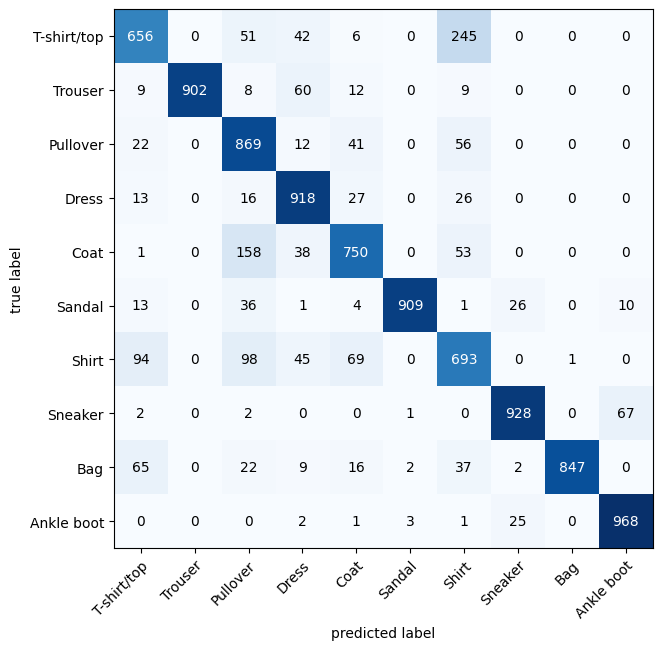

In [21]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Define confusion matrix metric (specify task)
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_name))

# Generate confusion matrix tensor
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Plot confusion matrix (without 'task' argument)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_name,
    figsize=(10,7)
)